In [251]:
# Data Manipulation
import numpy as np
import pandas as pd

# Display Setting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-Processing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.utils import resample
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

# Modelling
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier 

# Metric evaluation
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [252]:
# Connecting and Accessing Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**LOAD DATASET**

In [369]:
df_app_train = pd.read_csv("/content/drive/MyDrive/VIX-DS-HCI/home-credit-default-risk/application_train.csv")
df_app_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [254]:
df_app_test = pd.read_csv("/content/drive/MyDrive/VIX-DS-HCI/home-credit-default-risk/application_test.csv")
df_app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

##**Exploratory Data Analysis (EDA)**

###1. Dataset characteristics from application train

In [255]:
# Displays the number of rows and columns
df_app_train.shape

(307511, 122)

In [256]:
# Display complete information (data types, rows, columns) 
df_app_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [257]:
# Statistics Descriptive
df_app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

###2. Dataset characteristics application test

In [258]:
# Displays the number of rows and columns 
df_app_test.shape

(48744, 121)

In [259]:
# Display complete information (data types, rows, columns) 
df_app_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS

In [260]:
# Statistics Descriptive
df_app_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,16432.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,28212.000000,48736.000000,40076.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,26120.000000,48715.000000,48715.000000,48715.000000,48715.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,-3051.712949,11.786027,0.999979,0.809720,0.204702,0.998400,0.263130,0.162646,2.146767,2.038159,2.012596,12.007365,0.018833,0.055166,0.042036,0.077466,0.224664,0.174216,0.501180,0.518021,0.500106,0.122388,0.090065,0.978828,0.751137,0.047624,0.085168,0.151777,0.233706,0.238423,0.067192,0.105885,0.112286,0.009231,0.029387,0.119078,0.088998,0.978292,0.758327,0.045223,0.080570,0.147161,0.229390,0.233854,0.065914,0.110874,0.110687,0.008358,0.028161,0.122809,0.089529,0.978822,0.754344,0.047420,0.084128,0.151200,0.233154,0.237846,0.068069,0.107063,0.113368,0.008979,0.029296,0.107129,1.447644,0.143652,1.435738,0.101139,-1077.766228,0.0,0.786620,

###3. Data Visualization

**The Number of Clients Based on Their Repayment Abilities**

In [261]:
# Changed the 'TARGET' column values in the 'app_train' DataFrame to a more descriptive labels
label_target = {0: "No Payment Difficulties", 1: "Payment Difficulties"}
def decode_sentiment(label):
    return label_target[int(label)]

df_app_train['TARGET'] = df_app_train['TARGET'].apply(lambda x: decode_sentiment(x))

In [262]:
table_target = (df_app_train[['TARGET']]
                .groupby('TARGET')
                .agg(COUNT=('TARGET','count'))
                .sort_values(by=['COUNT'],ascending=False)
                .reset_index()
                )
table_target

,TARGET,COUNT
0,No Payment Difficulties,282686
1,Payment Difficulties,24825


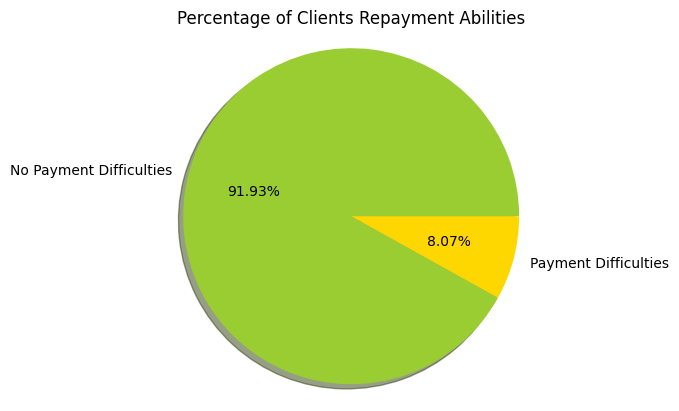

In [263]:
# Made in percentage
labels = ['No Payment Difficulties', 'Payment Difficulties']
colors = ['yellowgreen', 'gold']

plt.title('Percentage of Clients Repayment Abilities')
plt.pie(df_app_train.TARGET.value_counts(), labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True)

plt.axis('equal')
plt.show()

**The Number of Clients Based on Their Gender**

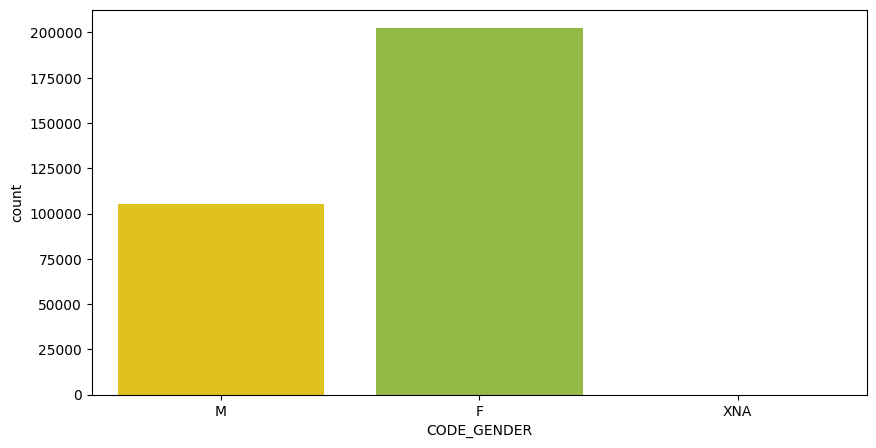

In [264]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='CODE_GENDER', data = df_app_train, palette = ['gold','yellowgreen'])
plt.show()

In [265]:
table_gender = (df_app_train[['CODE_GENDER']]
                .groupby('CODE_GENDER')
                .agg(COUNT=('CODE_GENDER','count'))
                .sort_values(by=['COUNT'],ascending=False)
                .reset_index()
                )
table_gender

,CODE_GENDER,COUNT
0,F,202448
1,M,105059
2,XNA,4


**CODE GENDER vs TARGET**

<Axes: title={'center': 'Clients Repayment Abilities By Gender\n'}, xlabel='CODE_GENDER', ylabel='count'>

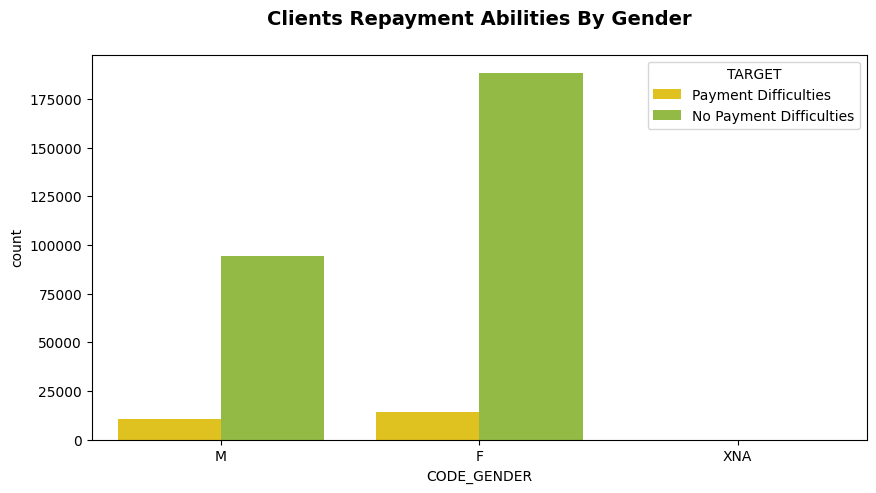

In [266]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Clients Repayment Abilities By Gender\n', fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data = df_app_train, hue = 'TARGET', palette = ['gold','yellowgreen'])

In [267]:
pd.DataFrame(df_app_train.groupby(['CODE_GENDER','TARGET']).count()['SK_ID_CURR']).reset_index()

,CODE_GENDER,TARGET,SK_ID_CURR
0,F,No Payment Difficulties,188278
1,F,Payment Difficulties,14170
2,M,No Payment Difficulties,94404
3,M,Payment Difficulties,10655
4,XNA,No Payment Difficulties,4


**CONTRACT TYPE vs TARGET**

<Axes: title={'center': 'Clients Repayment Abilities By Contract Type\n'}, xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

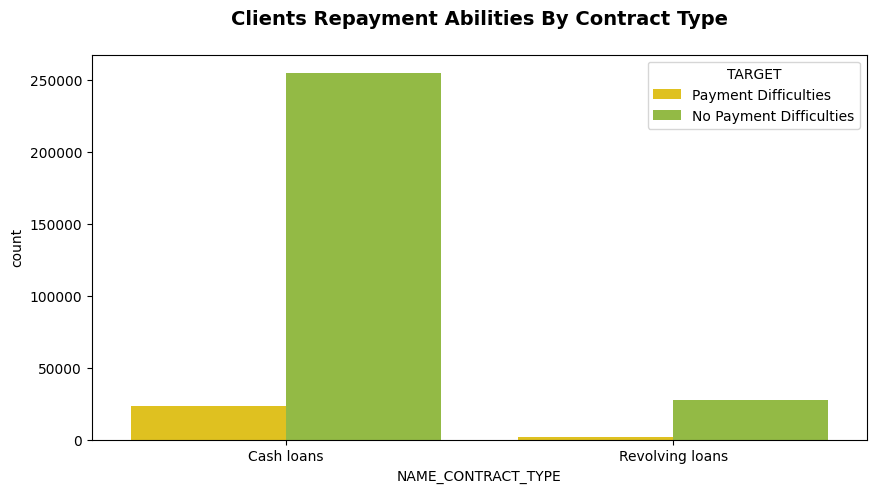

In [268]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Clients Repayment Abilities By Contract Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_CONTRACT_TYPE', data = df_app_train, hue = 'TARGET', palette = ['gold','yellowgreen'])

In [269]:
pd.DataFrame(df_app_train.groupby(['NAME_CONTRACT_TYPE','TARGET']).count()['SK_ID_CURR']).reset_index()

,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,No Payment Difficulties,255011
1,Cash loans,Payment Difficulties,23221
2,Revolving loans,No Payment Difficulties,27675
3,Revolving loans,Payment Difficulties,1604


**CAR OWNERSHIP STATUS vs TARGET**

<Axes: title={'center': 'Clients Repayment Abilities By Car Ownership Status\n'}, xlabel='FLAG_OWN_CAR', ylabel='count'>

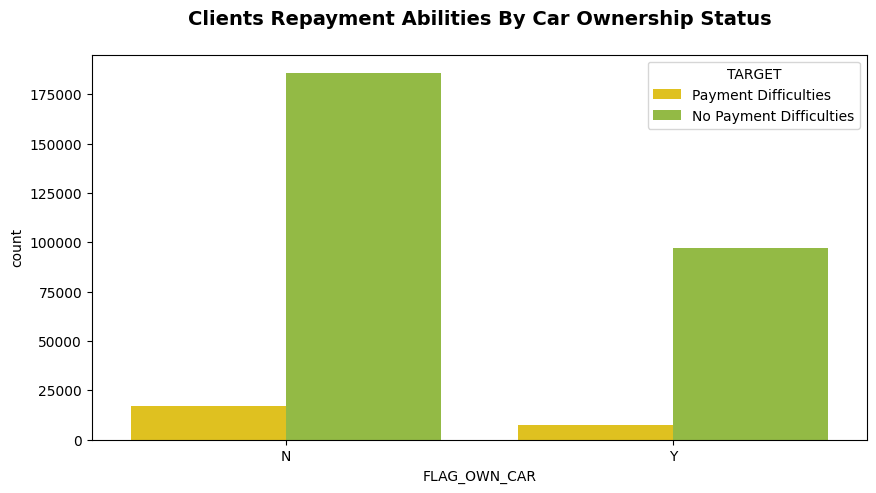

In [270]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Clients Repayment Abilities By Car Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_CAR', data = df_app_train, hue = 'TARGET', palette = ['gold','yellowgreen'])

In [271]:
pd.DataFrame(df_app_train.groupby(['FLAG_OWN_CAR','TARGET']).count()['SK_ID_CURR']).reset_index()

,FLAG_OWN_CAR,TARGET,SK_ID_CURR
0,N,No Payment Difficulties,185675
1,N,Payment Difficulties,17249
2,Y,No Payment Difficulties,97011
3,Y,Payment Difficulties,7576


**REALTY OWNERSHIP STATUS vs TARGET**

<Axes: title={'center': 'Clients Repayment Abilities By Realty Ownership Status\n'}, xlabel='FLAG_OWN_REALTY', ylabel='count'>

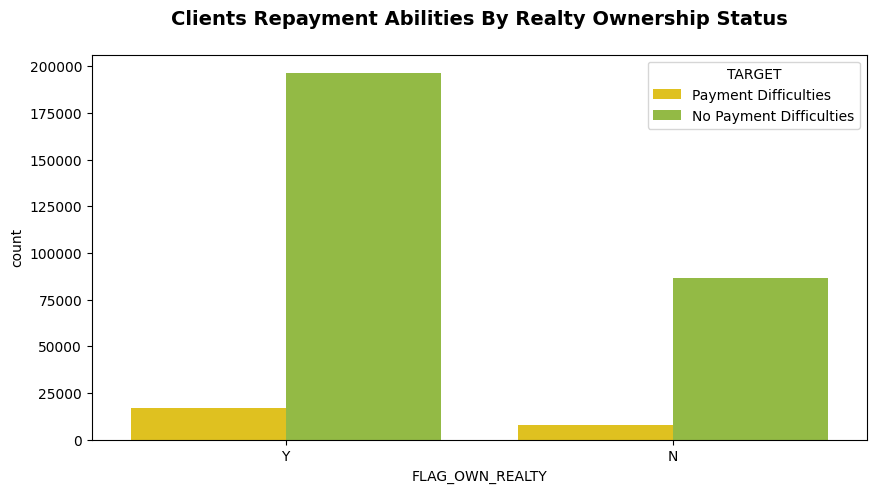

In [272]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Clients Repayment Abilities By Realty Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_REALTY', data = df_app_train, hue = 'TARGET', palette = ['gold','yellowgreen'])

In [273]:
pd.DataFrame(df_app_train.groupby(['FLAG_OWN_REALTY','TARGET']).count()['SK_ID_CURR']).reset_index()

,FLAG_OWN_REALTY,TARGET,SK_ID_CURR
0,N,No Payment Difficulties,86357
1,N,Payment Difficulties,7842
2,Y,No Payment Difficulties,196329
3,Y,Payment Difficulties,16983


**SUITE TYPE**

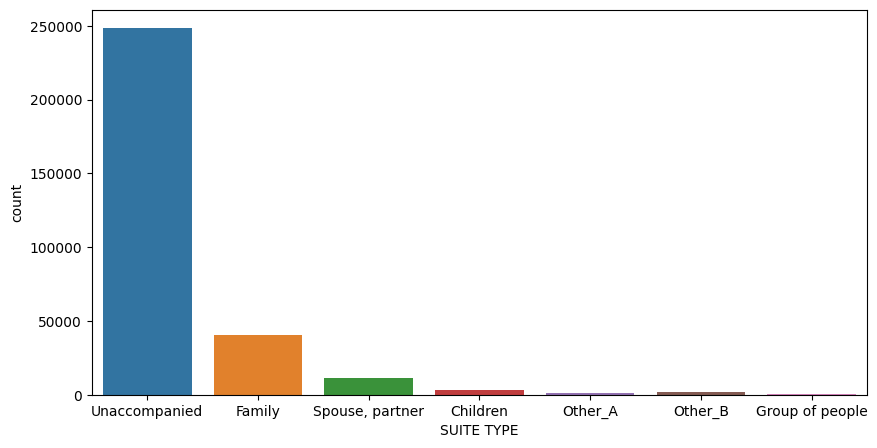

In [274]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='NAME_TYPE_SUITE',data = df_app_train)
plt.xlabel("SUITE TYPE")
plt.show()

In [275]:
table_suite_type = (df_app_train[['NAME_TYPE_SUITE']]
                    .groupby('NAME_TYPE_SUITE')
                    .agg(COUNT=('NAME_TYPE_SUITE','count'))
                    .sort_values(by=['COUNT'],ascending=False)
                    .reset_index()
                    )
table_suite_type

,NAME_TYPE_SUITE,COUNT
0,Unaccompanied,248526
1,Family,40149
2,"Spouse, partner",11370
3,Children,3267
4,Other_B,1770
5,Other_A,866
6,Group of people,271


**SUITE TYPE vs TARGET**

<Axes: title={'center': 'Clients Repayment Abilities By Suite Type\n'}, xlabel='NAME_TYPE_SUITE', ylabel='count'>

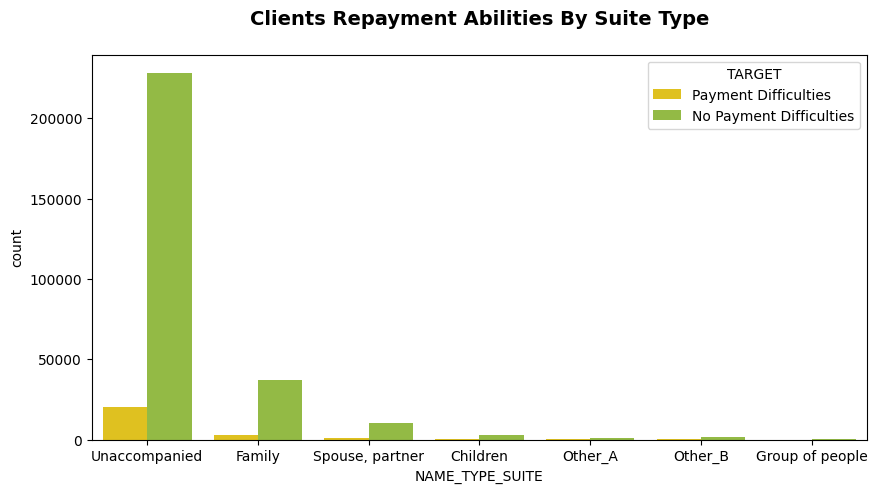

In [276]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Clients Repayment Abilities By Suite Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_TYPE_SUITE', data = df_app_train, hue = 'TARGET', palette = ['gold','yellowgreen'])

In [277]:
pd.DataFrame(df_app_train.groupby(['NAME_TYPE_SUITE','TARGET']).count()['SK_ID_CURR']).reset_index()

,NAME_TYPE_SUITE,TARGET,SK_ID_CURR
0,Children,No Payment Difficulties,3026
1,Children,Payment Difficulties,241
2,Family,No Payment Difficulties,37140
3,Family,Payment Difficulties,3009
4,Group of people,No Payment Difficulties,248
5,Group of people,Payment Difficulties,23
6,Other_A,No Payment Difficulties,790
7,Other_A,Payment Difficulties,76
8,Other_B,No Payment Difficulties,1596
9,Other_B,Payment Difficulties,174


**INCOME TYPE**

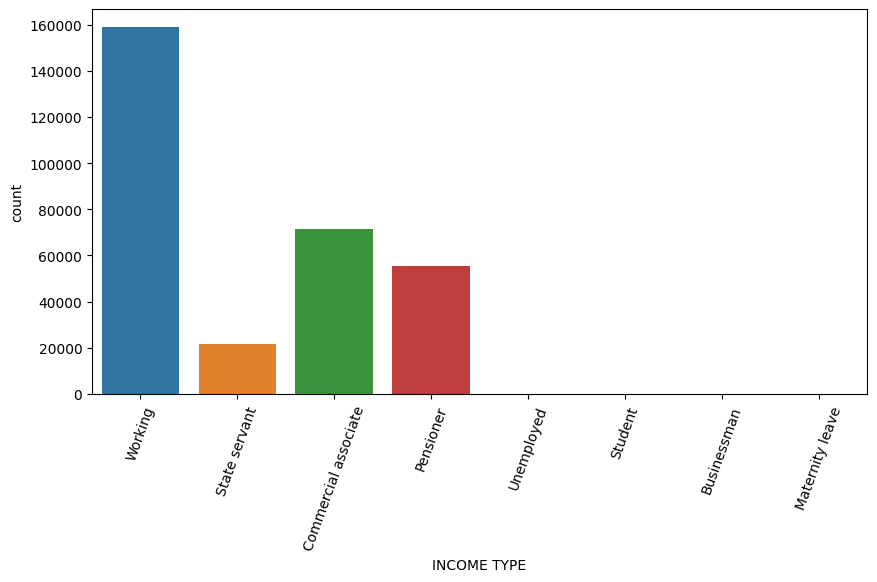

In [278]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='NAME_INCOME_TYPE',data = df_app_train)
plt.xlabel("INCOME TYPE")
plt.xticks(rotation=70)
plt.show()

In [279]:
table_income_type = (df_app_train[['NAME_INCOME_TYPE']]
                     .groupby('NAME_INCOME_TYPE')
                     .agg(COUNT=('NAME_INCOME_TYPE','count'))
                     .sort_values(by=['COUNT'],ascending=False)
                     .reset_index()
                     )
table_income_type

,NAME_INCOME_TYPE,COUNT
0,Working,158774
1,Commercial associate,71617
2,Pensioner,55362
3,State servant,21703
4,Unemployed,22
5,Student,18
6,Businessman,10
7,Maternity leave,5


**INCOME TYPE vs TARGET**

<Axes: title={'center': 'Clients Repayment Abilities By Income Type\n'}, xlabel='NAME_INCOME_TYPE', ylabel='count'>

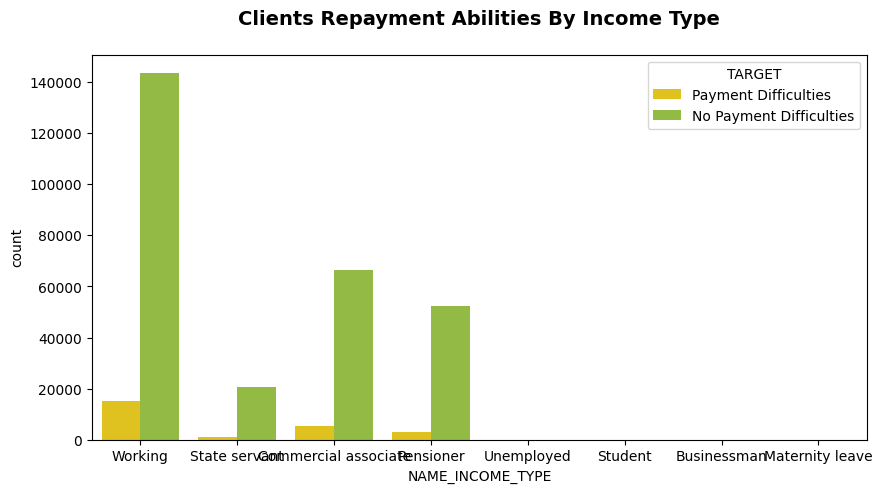

In [280]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Clients Repayment Abilities By Income Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_INCOME_TYPE', data = df_app_train, hue = 'TARGET', palette = ['gold','yellowgreen'])

In [281]:
pd.DataFrame(df_app_train.groupby(['NAME_INCOME_TYPE','TARGET']).count()['SK_ID_CURR']).reset_index()

,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
0,Businessman,No Payment Difficulties,10
1,Commercial associate,No Payment Difficulties,66257
2,Commercial associate,Payment Difficulties,5360
3,Maternity leave,No Payment Difficulties,3
4,Maternity leave,Payment Difficulties,2
5,Pensioner,No Payment Difficulties,52380
6,Pensioner,Payment Difficulties,2982
7,State servant,No Payment Difficulties,20454
8,State servant,Payment Difficulties,1249
9,Student,No Payment Difficulties,18


**EDUCATION TYPE**

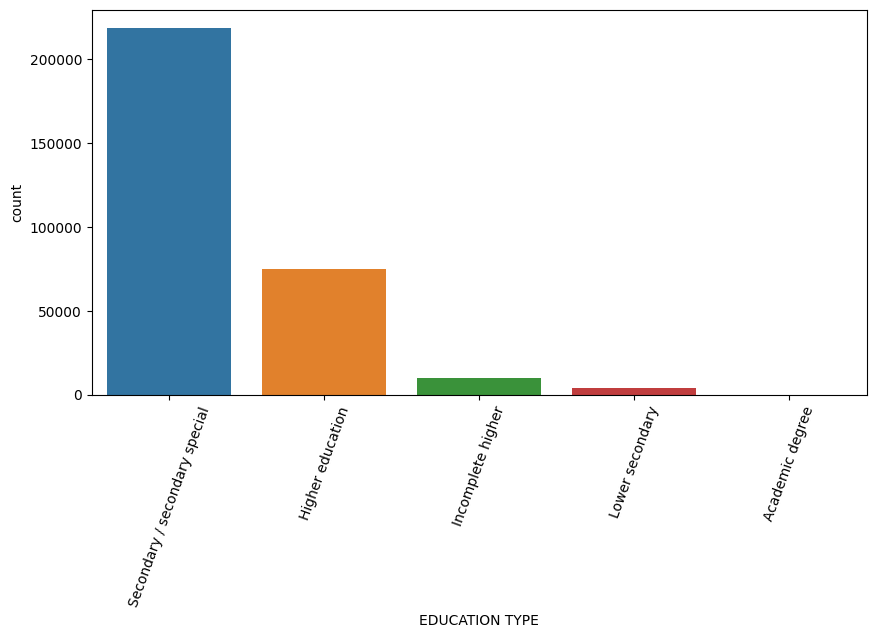

In [282]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='NAME_EDUCATION_TYPE',data = df_app_train)
plt.xlabel("EDUCATION TYPE")
plt.xticks(rotation=70)
plt.show()

In [283]:
table_education_type = (df_app_train[['NAME_EDUCATION_TYPE']]
                        .groupby('NAME_EDUCATION_TYPE')
                        .agg(COUNT=('NAME_EDUCATION_TYPE','count'))
                        .sort_values(by=['COUNT'],ascending=False)
                        .reset_index()
                        )
table_education_type

,NAME_EDUCATION_TYPE,COUNT
0,Secondary / secondary special,218391
1,Higher education,74863
2,Incomplete higher,10277
3,Lower secondary,3816
4,Academic degree,164


**EDUCATION TYPE vs TARGET**

<Axes: title={'center': 'Clients Repayment Abilities By Education Type\n'}, xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

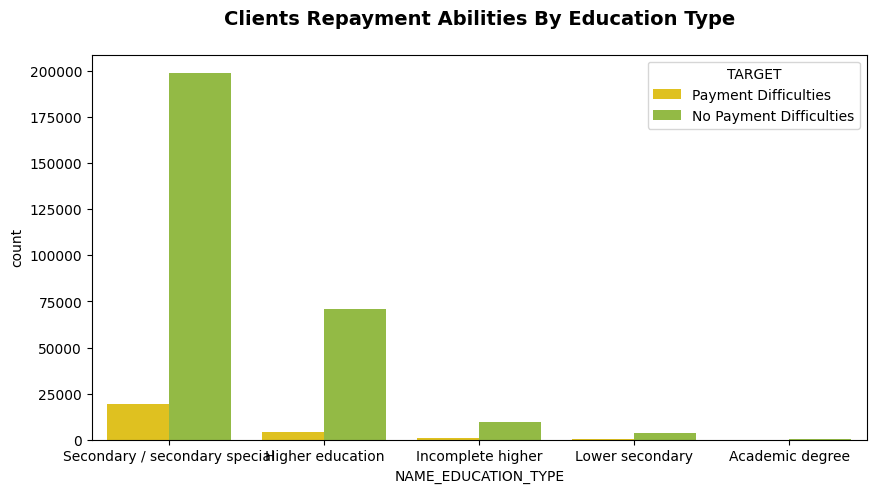

In [284]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Clients Repayment Abilities By Education Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_EDUCATION_TYPE', data = df_app_train, hue = 'TARGET', palette = ['gold','yellowgreen'])

In [285]:
pd.DataFrame(df_app_train.groupby(['NAME_EDUCATION_TYPE','TARGET']).count()['SK_ID_CURR']).reset_index()

,NAME_EDUCATION_TYPE,TARGET,SK_ID_CURR
0,Academic degree,No Payment Difficulties,161
1,Academic degree,Payment Difficulties,3
2,Higher education,No Payment Difficulties,70854
3,Higher education,Payment Difficulties,4009
4,Incomplete higher,No Payment Difficulties,9405
5,Incomplete higher,Payment Difficulties,872
6,Lower secondary,No Payment Difficulties,3399
7,Lower secondary,Payment Difficulties,417
8,Secondary / secondary special,No Payment Difficulties,198867
9,Secondary / secondary special,Payment Difficulties,19524


**FAMILY STATUS**

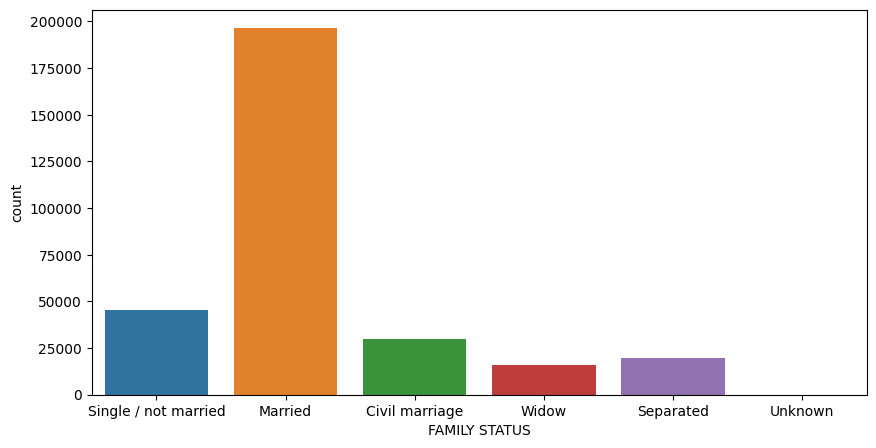

In [286]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='NAME_FAMILY_STATUS',data = df_app_train)
plt.xlabel("FAMILY STATUS")
plt.show()

In [287]:
table_family_status = (df_app_train[['NAME_FAMILY_STATUS']]
                       .groupby('NAME_FAMILY_STATUS')
                       .agg(COUNT=('NAME_FAMILY_STATUS','count'))
                       .sort_values(by=['COUNT'],ascending=False)
                       .reset_index()
                       )
table_family_status

,NAME_FAMILY_STATUS,COUNT
0,Married,196432
1,Single / not married,45444
2,Civil marriage,29775
3,Separated,19770
4,Widow,16088
5,Unknown,2


**FAMILY STATUS vs TARGET**

<Axes: title={'center': 'Clients Repayment Abilities By Family Status\n'}, xlabel='NAME_FAMILY_STATUS', ylabel='count'>

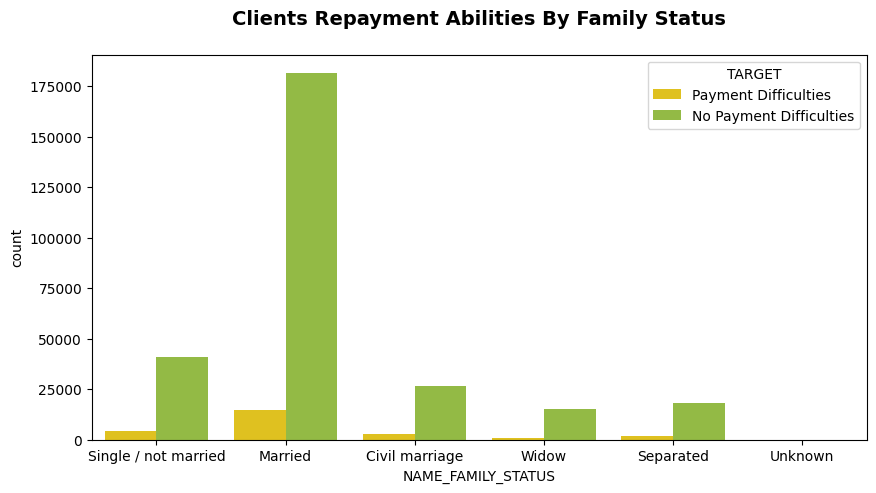

In [288]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Clients Repayment Abilities By Family Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_FAMILY_STATUS', data = df_app_train, hue = 'TARGET', palette = ['gold','yellowgreen'])

In [289]:
pd.DataFrame(df_app_train.groupby(['NAME_FAMILY_STATUS','TARGET']).count()['SK_ID_CURR']).reset_index()

,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
0,Civil marriage,No Payment Difficulties,26814
1,Civil marriage,Payment Difficulties,2961
2,Married,No Payment Difficulties,181582
3,Married,Payment Difficulties,14850
4,Separated,No Payment Difficulties,18150
5,Separated,Payment Difficulties,1620
6,Single / not married,No Payment Difficulties,40987
7,Single / not married,Payment Difficulties,4457
8,Unknown,No Payment Difficulties,2
9,Widow,No Payment Difficulties,15151


 **HOUSING TYPE**

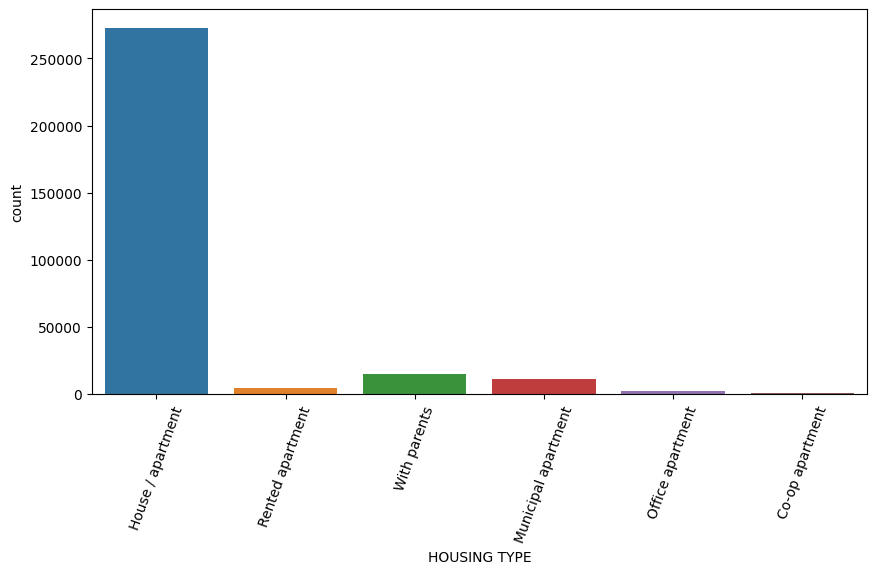

In [290]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='NAME_HOUSING_TYPE',data = df_app_train)
plt.xlabel('HOUSING TYPE')
plt.xticks(rotation=70)
plt.show()

In [291]:
table_family_status = (df_app_train[['NAME_HOUSING_TYPE']]
                       .groupby('NAME_HOUSING_TYPE')
                       .agg(COUNT=('NAME_HOUSING_TYPE','count'))
                       .sort_values(by=['COUNT'],ascending=False)
                       .reset_index()
                       )
table_family_status

,NAME_HOUSING_TYPE,COUNT
0,House / apartment,272868
1,With parents,14840
2,Municipal apartment,11183
3,Rented apartment,4881
4,Office apartment,2617
5,Co-op apartment,1122


**HOUSING TYPE vs TARGET**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'House / apartment'),
  Text(1, 0, 'Rented apartment'),
  Text(2, 0, 'With parents'),
  Text(3, 0, 'Municipal apartment'),
  Text(4, 0, 'Office apartment'),
  Text(5, 0, 'Co-op apartment')])

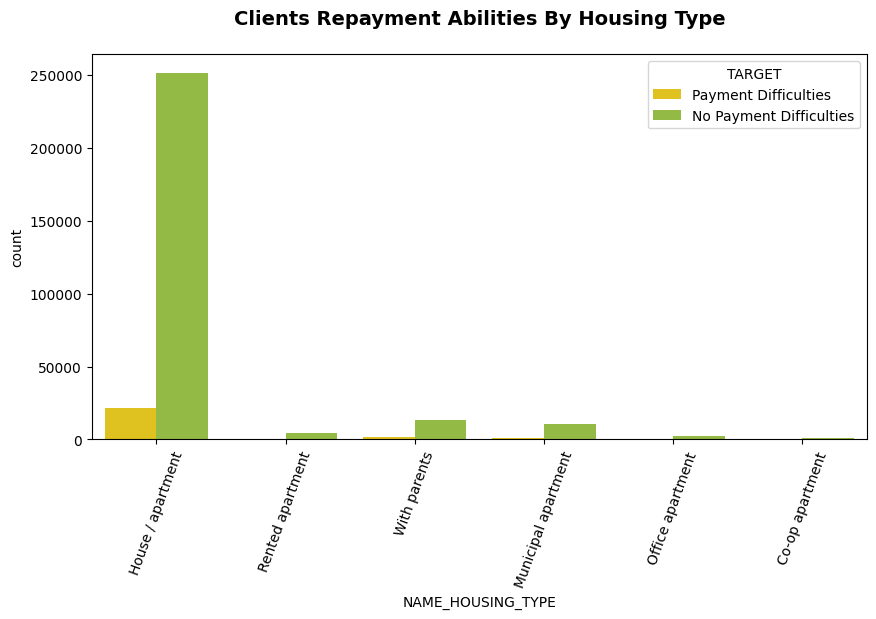

In [292]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Clients Repayment Abilities By Housing Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_HOUSING_TYPE', data = df_app_train, hue = 'TARGET', palette = ['gold','yellowgreen'])
plt.xticks(rotation=70)

In [293]:
pd.DataFrame(df_app_train.groupby(['NAME_HOUSING_TYPE','TARGET']).count()['SK_ID_CURR']).reset_index()

,NAME_HOUSING_TYPE,TARGET,SK_ID_CURR
0,Co-op apartment,No Payment Difficulties,1033
1,Co-op apartment,Payment Difficulties,89
2,House / apartment,No Payment Difficulties,251596
3,House / apartment,Payment Difficulties,21272
4,Municipal apartment,No Payment Difficulties,10228
5,Municipal apartment,Payment Difficulties,955
6,Office apartment,No Payment Difficulties,2445
7,Office apartment,Payment Difficulties,172
8,Rented apartment,No Payment Difficulties,4280
9,Rented apartment,Payment Difficulties,601


**OCCUPATION TYPE**

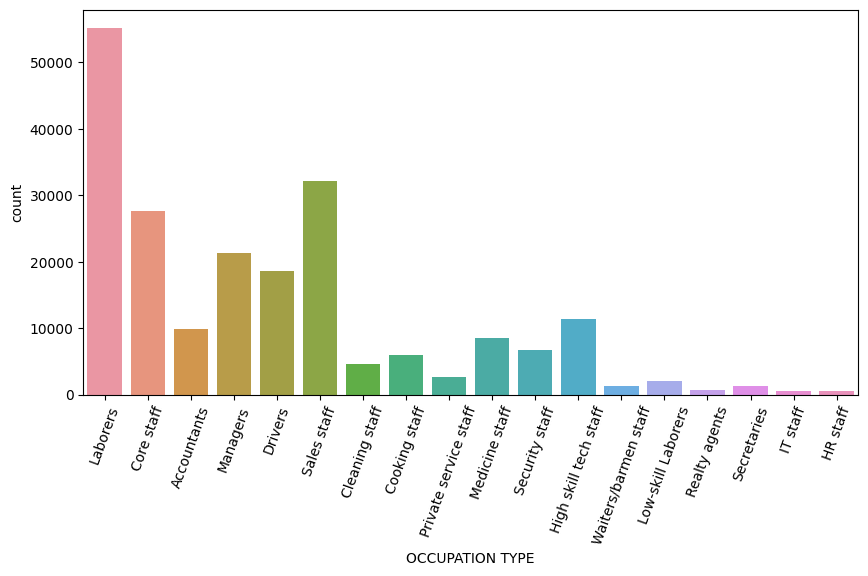

In [294]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='OCCUPATION_TYPE',data = df_app_train)
plt.xlabel('OCCUPATION TYPE')
plt.xticks(rotation=70)
plt.show()

In [295]:
table_occupation_type = (df_app_train[['OCCUPATION_TYPE']]
                        .groupby('OCCUPATION_TYPE')
                        .agg(COUNT=('OCCUPATION_TYPE','count'))
                        .sort_values(by=['COUNT'],ascending=False)
                        .reset_index()
                        )
table_occupation_type

,OCCUPATION_TYPE,COUNT
0,Laborers,55186
1,Sales staff,32102
2,Core staff,27570
3,Managers,21371
4,Drivers,18603
5,High skill tech staff,11380
6,Accountants,9813
7,Medicine staff,8537
8,Security staff,6721
9,Cooking staff,5946


**OCCUPATION TYPE vs TARGET**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

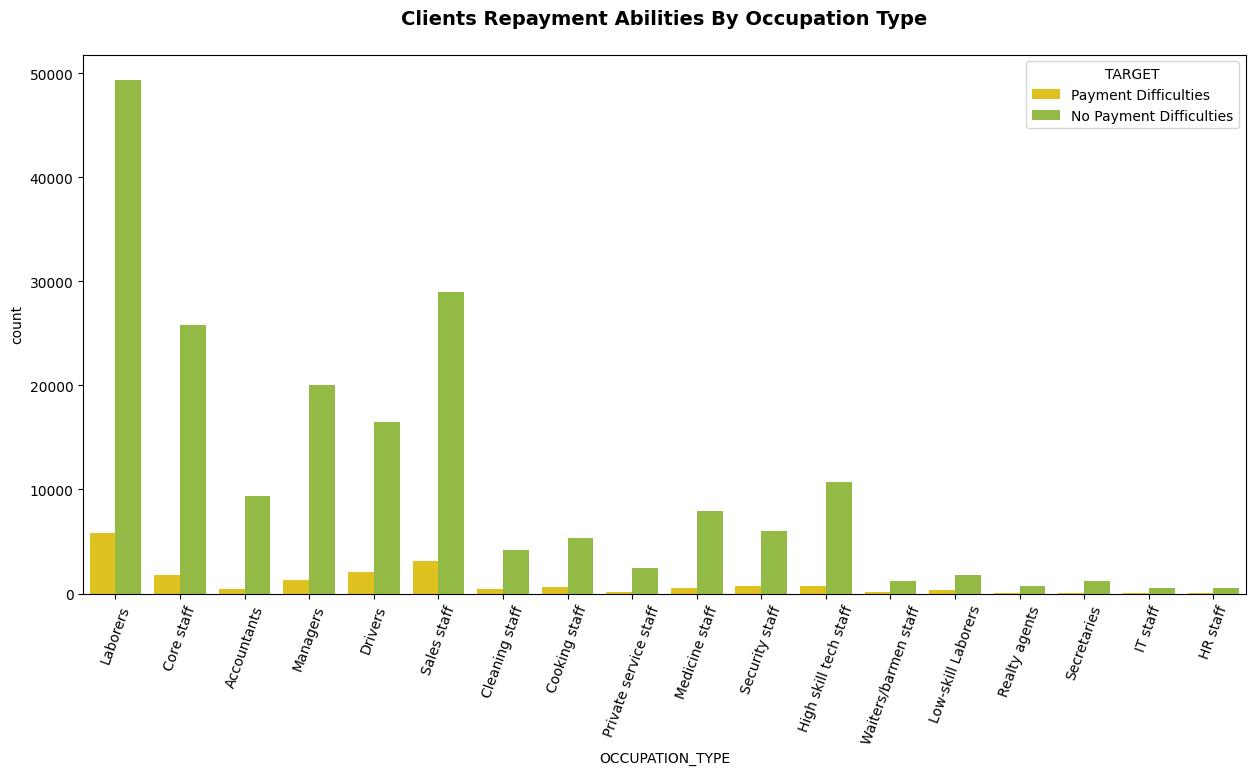

In [296]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_title('Clients Repayment Abilities By Occupation Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='OCCUPATION_TYPE', data = df_app_train, hue = 'TARGET', palette = ['gold','yellowgreen'])
plt.xticks(rotation=70)

In [297]:
pd.DataFrame(df_app_train.groupby(['OCCUPATION_TYPE','TARGET']).count()['SK_ID_CURR']).reset_index()

,OCCUPATION_TYPE,TARGET,SK_ID_CURR
0,Accountants,No Payment Difficulties,9339
1,Accountants,Payment Difficulties,474
2,Cleaning staff,No Payment Difficulties,4206
3,Cleaning staff,Payment Difficulties,447
4,Cooking staff,No Payment Difficulties,5325
5,Cooking staff,Payment Difficulties,621
6,Core staff,No Payment Difficulties,25832
7,Core staff,Payment Difficulties,1738
8,Drivers,No Payment Difficulties,16496
9,Drivers,Payment Difficulties,2107


**ORGANIZATION TYPE**

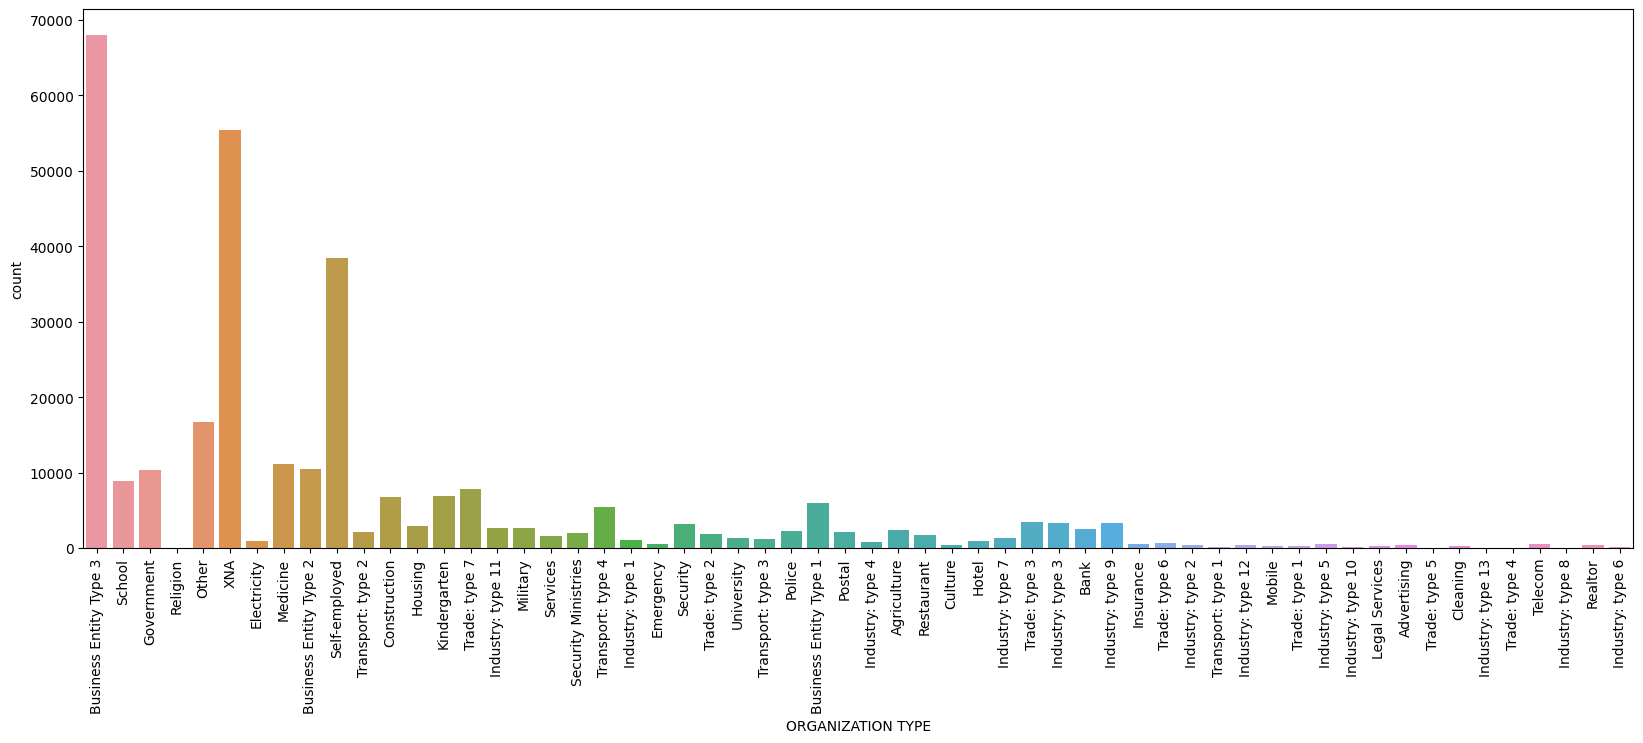

In [298]:
fig, ax = plt.subplots(figsize=(20,7))
sns.countplot(x='ORGANIZATION_TYPE',data = df_app_train)
plt.xlabel('ORGANIZATION TYPE')
plt.xticks(rotation=90)
plt.show()

In [299]:
table_organization_type = (df_app_train[['ORGANIZATION_TYPE']]
                        .groupby('ORGANIZATION_TYPE')
                        .agg(COUNT=('ORGANIZATION_TYPE','count'))
                        .sort_values(by=['COUNT'],ascending=False)
                        .reset_index()
                        )
table_organization_type

,ORGANIZATION_TYPE,COUNT
0,Business Entity Type 3,67992
1,XNA,55374
2,Self-employed,38412
3,Other,16683
4,Medicine,11193
5,Business Entity Type 2,10553
6,Government,10404
7,School,8893
8,Trade: type 7,7831
9,Kindergarten,6880


**ORGANIZATION TYPE vs TARGET**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, 'Business Entity Type 3'),
  Text(1, 0, 'School'),
  Text(2, 0, 'Government'),
  Text(3, 0, 'Religion'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'XNA'),
  Text(6, 0, 'Electricity'),
  Text(7, 0, 'Medicine'),
  Text(8, 0, 'Business Entity Type 2'),
  Text(9, 0, 'Self-employed'),
  Text(10, 0, 'Transport: type 2'),
  Text(11, 0, 'Construction'),
  Text(12, 0, 'Housing'),
  Text(13, 0, 'Kindergarten'),
  Text(14, 0, 'Trade: type 7'),
  Text(15, 0, 'Industry: type 11'),
  Text(16, 0, 'Military'),
  Text(17, 0, 'Services'),
  Text(18, 0, 'Security Ministries'),
  Text(19, 0, 'Transport: type 4'),
  Text(20, 0, 'Industry: type 1'),
  Text(21, 0, 'Emergency'),
  Text(22, 0, 'Security'),
  Text(23, 0, 'Trade: type 2'),
  Te

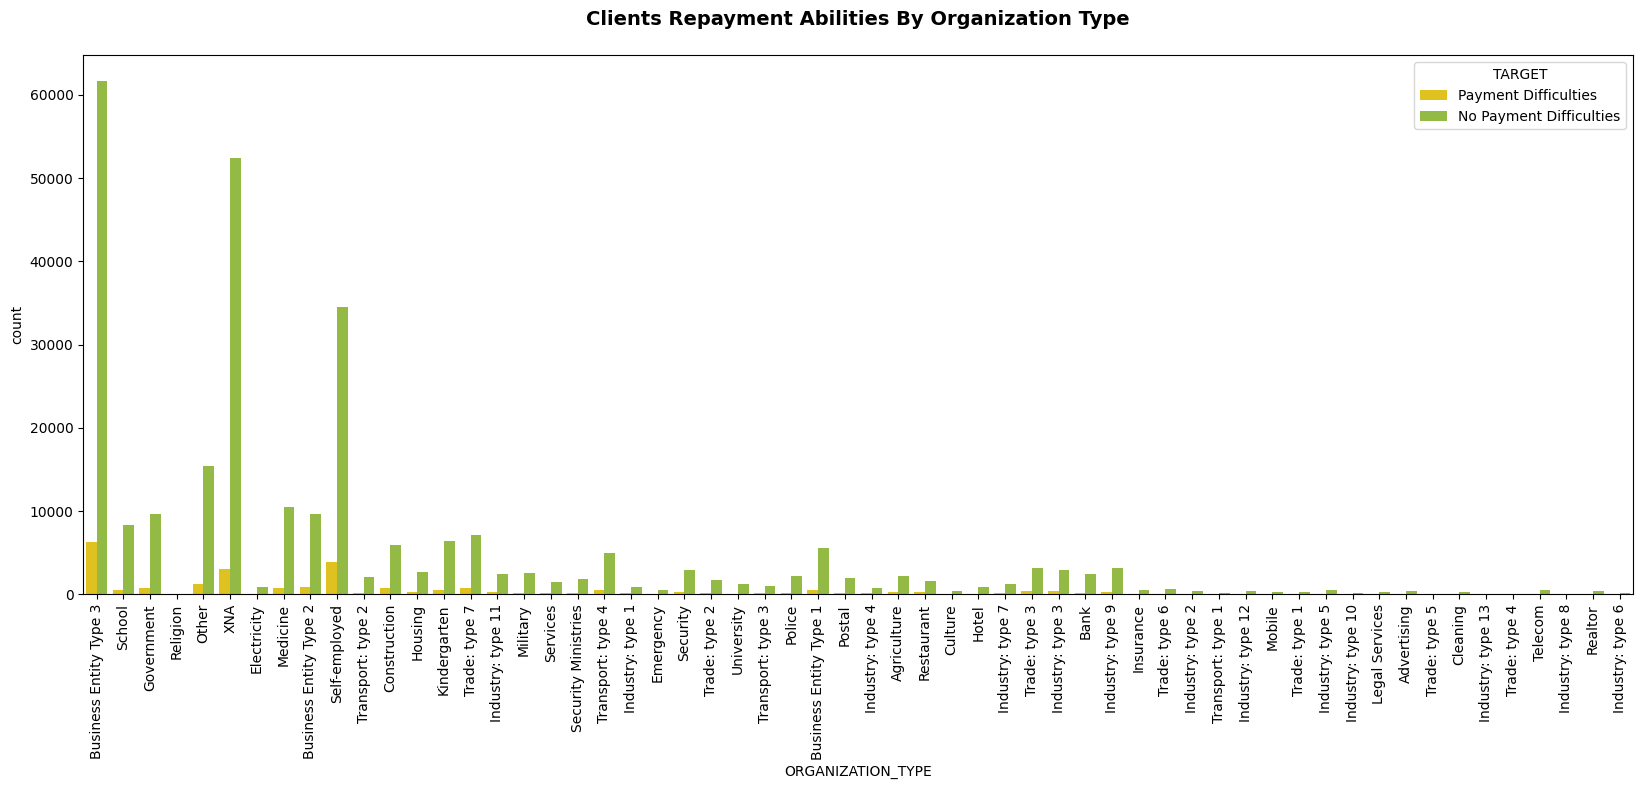

In [300]:
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title('Clients Repayment Abilities By Organization Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='ORGANIZATION_TYPE', data = df_app_train, hue = 'TARGET', palette = ['gold','yellowgreen'])
plt.xticks(rotation=90)

In [301]:
pd.DataFrame(df_app_train.groupby(['ORGANIZATION_TYPE','TARGET']).count()['SK_ID_CURR']).reset_index() 

,ORGANIZATION_TYPE,TARGET,SK_ID_CURR
0,Advertising,No Payment Difficulties,394
1,Advertising,Payment Difficulties,35
2,Agriculture,No Payment Difficulties,2197
3,Agriculture,Payment Difficulties,257
4,Bank,No Payment Difficulties,2377
5,Bank,Payment Difficulties,130
6,Business Entity Type 1,No Payment Difficulties,5497
7,Business Entity Type 1,Payment Difficulties,487
8,Business Entity Type 2,No Payment Difficulties,9653
9,Business Entity Type 2,Payment Difficulties,900


**COUNT CHILDREN**

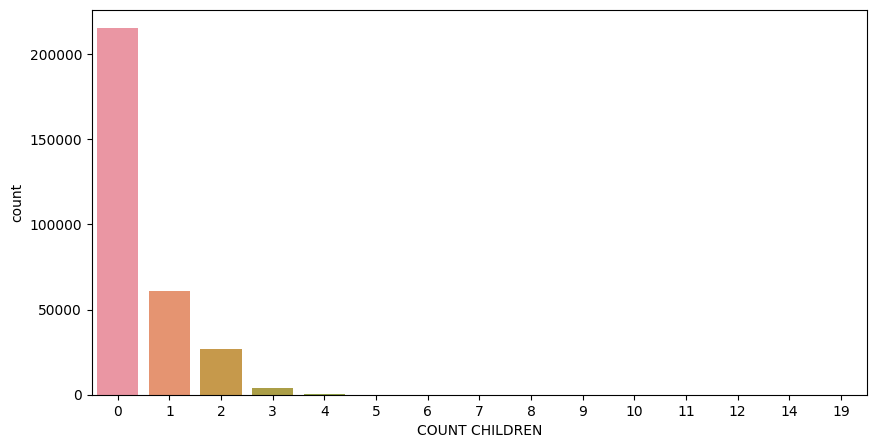

In [302]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='CNT_CHILDREN',data = df_app_train)
plt.xlabel('COUNT CHILDREN')
plt.show()

In [303]:
table_count_children = (df_app_train[['CNT_CHILDREN']]
                        .groupby('CNT_CHILDREN')
                        .agg(COUNT=('CNT_CHILDREN','count'))
                        .sort_values(by=['COUNT'],ascending=False)
                        .reset_index()
                        )
table_count_children

,CNT_CHILDREN,COUNT
0,0,215371
1,1,61119
2,2,26749
3,3,3717
4,4,429
5,5,84
6,6,21
7,7,7
8,14,3
9,8,2


**COUNT CHILDREN vs TARGET**

<Axes: title={'center': 'Clients Repayment Abilities By Count Children\n'}, xlabel='CNT_CHILDREN', ylabel='count'>

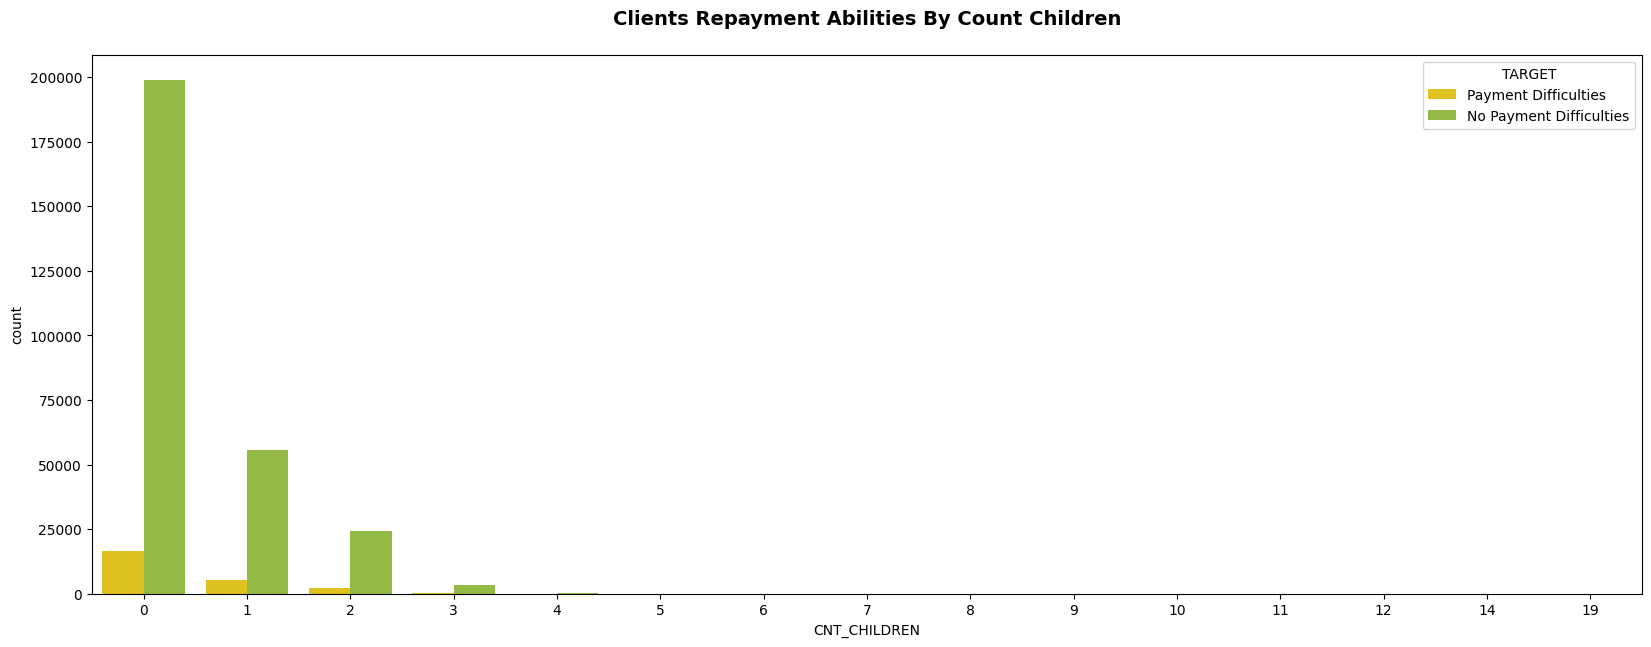

In [304]:
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title('Clients Repayment Abilities By Count Children\n', fontweight='bold', fontsize=14)
sns.countplot(x='CNT_CHILDREN', data = df_app_train, hue = 'TARGET', palette = ['gold','yellowgreen'])

In [305]:
pd.DataFrame(df_app_train.groupby(['CNT_CHILDREN','TARGET']).count()['SK_ID_CURR']).reset_index() 

,CNT_CHILDREN,TARGET,SK_ID_CURR
0,0,No Payment Difficulties,198762
1,0,Payment Difficulties,16609
2,1,No Payment Difficulties,55665
3,1,Payment Difficulties,5454
4,2,No Payment Difficulties,24416
5,2,Payment Difficulties,2333
6,3,No Payment Difficulties,3359
7,3,Payment Difficulties,358
8,4,No Payment Difficulties,374
9,4,Payment Difficulties,55


**AMT CREDIT vs TARGET**

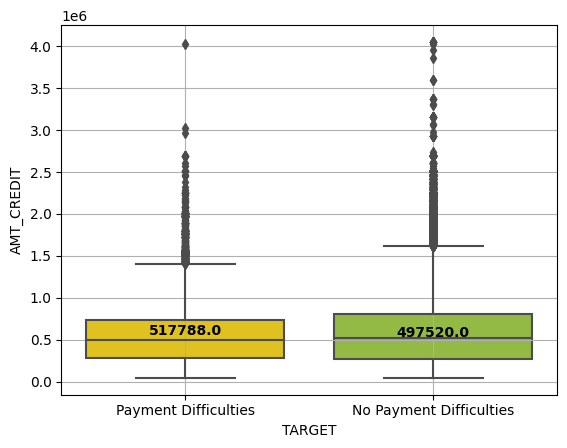

In [306]:
# Create a boxplot
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=df_app_train, palette=['gold', 'yellowgreen'])

# Get the median value
medians = df_app_train.groupby('TARGET')['AMT_CREDIT'].median()

# Displays the median values on the boxplot
for i in range(len(medians)):
    plt.text(i, medians[i], str(medians[i]), ha='center', va='bottom', fontweight='bold', color='black')

# Adding a grid on the plot
plt.grid()

plt.show()

Terlihat dari hasil boxplot, nilai median jumlah kredit nasabah yang mengalami kesulitan pembayaran lebih besar daripada yang tidak mengalami kesulitan pembayaran, ini dapat menunjukkan bahwa nasabah yang mengalami kesulitan pembayaran memiliki beban utang yang lebih tinggi atau jumlah kredit yang lebih besar daripada yang tidak mengalami kesulitan pembayaran.

Hal ini dapat menjadi indikasi adanya masalah keuangan yang lebih serius pada kelompok nasabah yang mengalami kesulitan pembayaran. Para nasabah tersebut mungkin mengalami kesulitan dalam mengelola utang mereka, menghadapi keterbatasan keuangan, atau mengalami ketidakstabilan dalam penghasilan mereka.

 **AMT INCOME TOTAL vs TARGET**

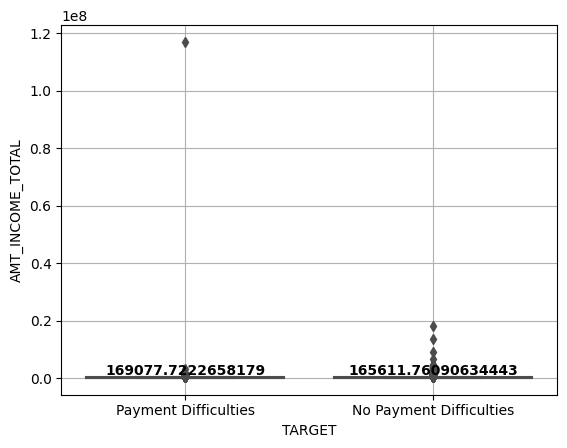

In [307]:
# Create a boxplot
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df_app_train, palette=['gold', 'yellowgreen'])

# Get the median value
means = df_app_train.groupby('TARGET')['AMT_INCOME_TOTAL'].mean()

# Displays the median values on the boxplot
for i in range(len(means)):
    plt.text(i, means[i], str(means[i]), ha='center', va='bottom', fontweight='bold', color='black')

# Adding a grid on the plot
plt.grid()

plt.show()

Terlihat dari hasil boxplot, nilai mean (rata-rata) jumlah total penghasilan nasabah yang mengalami kesulitan pembayaran lebih besar daripada yang tidak mengalami kesulitan pembayaran, ini dapat menunjukkan bahwa secara rata-rata kelompok nasabah yang mengalami kesulitan pembayaran memiliki penghasilan yang lebih tinggi.

Dalam konteks keuangan, nilai mean penghasilan dapat memberikan gambaran umum tentang tingkat penghasilan kelompok nasabah tersebut. Jika rata-rata penghasilan nasabah tinggi, ini dapat menunjukkan adanya potensi penghasilan yang cukup untuk membayar pinjaman atau kemudahan untuk membayar.

Namun, perlu dicatat bahwa nilai mean (rata-rata) penghasilan dapat dipengaruhi oleh adanya outlier atau nilai ekstrem di dalam kelompok data seperti pada "TARGET = Payment Dificulties". Jika ada beberapa nasabah dengan penghasilan sangat tinggi di kelompok nasabah yang mengalami kesulitan pembayaran, hal ini dapat mempengaruhi nilai mean secara signifikan.

In [308]:
no = df_app_train[df_app_train['TARGET']=='No Payment Difficulties']['DAYS_BIRTH'].values/-365
yes = df_app_train[df_app_train['TARGET']=='Payment Difficulties']['DAYS_BIRTH'].values/-365

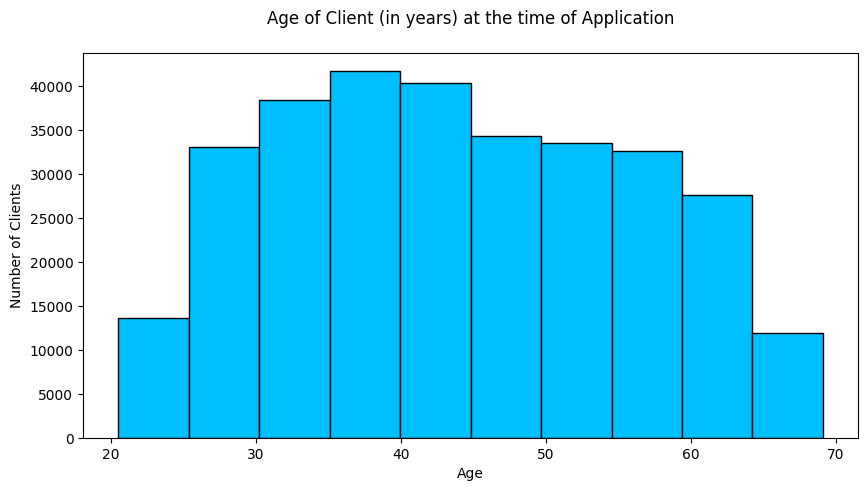

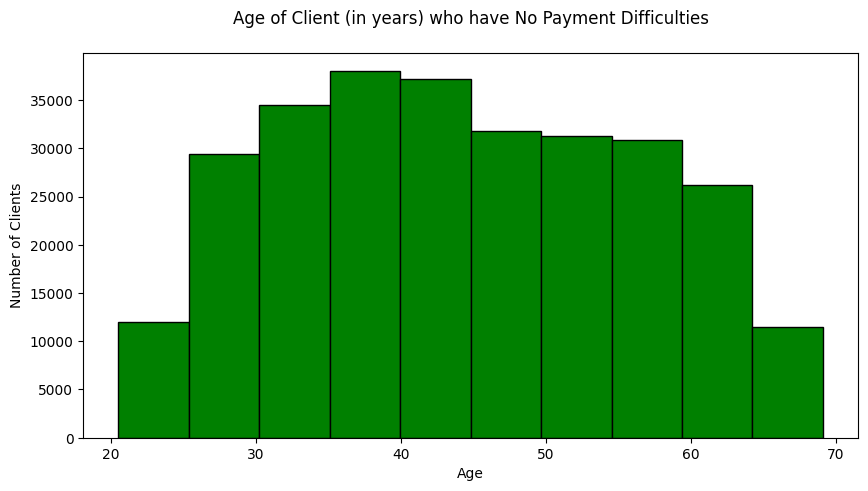

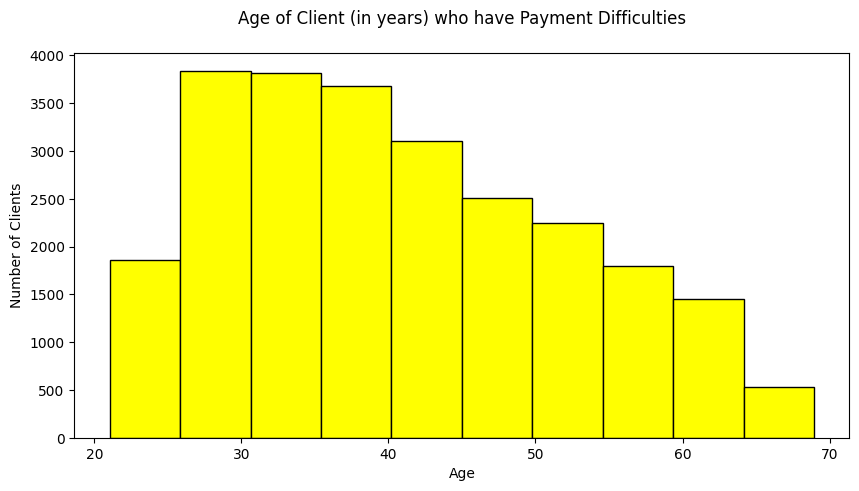

In [309]:
# Create a histogram for the age of the clients
plt.figure(figsize=(10,5))
plt.hist(df_app_train['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='deepskyblue')
plt.title('Age of Client (in years) at the time of Application\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

# Create a histogram for the age of clients who have no payment difficulties
plt.figure(figsize=(10,5))
plt.hist(no, bins=10, edgecolor='black', color='Green')
plt.title('Age of Client (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

# Create a histogram for the age of clients who have payment difficulties.
plt.figure(figsize=(10,5))
plt.hist(yes, bins=10, edgecolor='black', color='Yellow')
plt.title('Age of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

##**DATA CLEANING**

**Detecting Data Duplicating**

In [310]:
print('The number of duplication is:', df_app_train.duplicated().sum())

The number of duplication is: 0


**Detecting Missing Values**

In [311]:
# check for empty elements
print('Missing values status:', df_app_train.isnull().values.any())
mv = pd.DataFrame(df_app_train.isnull().sum(), columns=['Total Null Values'])
mv['Percentage'] = (mv['Total Null Values']/df_app_train.shape[0])*100
mv.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MODE,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MEDI,210199,68.354953


In [312]:
# drop features that have large number of missing values (± 50%)
df_app_train.drop(df_app_train.iloc[:, 44:91], inplace=True, axis=1)

In [313]:
# after drop some features
print('Missing values status:', df_app_train.isnull().values.any())
mv = pd.DataFrame(df_app_train.isnull().sum().sort_values(), columns=['Total Null Values'])
mv['Percentage'] = (mv['Total Null Values']/df_app_train.shape[0])*100
mv.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,OWN_CAR_AGE,202929,65.990810
1,EXT_SOURCE_1,173378,56.381073
2,OCCUPATION_TYPE,96391,31.345545
3,EXT_SOURCE_3,60965,19.825307
4,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
5,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
6,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
7,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
8,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
9,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631


In [314]:
df_app_train.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [315]:
# after drop some features
print('Missing values status:', df_app_train.isnull().values.any())
mv = pd.DataFrame(df_app_train.isnull().sum().sort_values(), columns=['Total Null Values'])
mv['Percentage'] = (mv['Total Null Values']/df_app_train.shape[0])*100
mv.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,OCCUPATION_TYPE,96391,31.345545
1,EXT_SOURCE_3,60965,19.825307
2,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
3,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
4,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
5,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
6,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
7,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
8,NAME_TYPE_SUITE,1292,0.420148
9,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021


In [316]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

category_columns = df_app_train.select_dtypes(include=['object']).columns.tolist()
integer_columns = df_app_train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_app_train:
    if df_app_train[column].isnull().any():
        if(column in category_columns):
            df_app_train[column]=df_train[column].fillna(df_app_train[column].mode()[0])
        else:
            df_app_train[column]=df_train[column].fillna(df_app_train[column].median())

In [317]:
# after imputation
print('Missing values status:', df_app_train.isnull().values.any())
print('\nThe number of missing values for each columns (after imputation): \n')
mv = pd.DataFrame(df_app_train.isnull().sum().sort_values(), columns=['Total Null Values'])
mv['Percentage'] = (mv['Total Null Values']/df_app_train.shape[0])*100
mv.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: False

The number of missing values for each columns (after imputation): 



,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,REG_REGION_NOT_WORK_REGION,0,0.0
2,REGION_POPULATION_RELATIVE,0,0.0
3,AMT_INCOME_TOTAL,0,0.0
4,TARGET,0,0.0
5,NAME_CONTRACT_TYPE,0,0.0
6,CODE_GENDER,0,0.0
7,FLAG_OWN_CAR,0,0.0
8,FLAG_OWN_REALTY,0,0.0
9,CNT_CHILDREN,0,0.0


##**MACHINE LEARNING MODELS**

**LABEL ENCODING**

In [318]:
# label encoder for object features
df_app_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
              "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
              "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = df_app_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
              "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
              "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)
df_app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Payment Difficulties,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,No Payment Difficulties,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,No Payment Difficulties,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,No Payment Difficulties,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,No Payment Difficulties,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [319]:
df_app_train.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [320]:
df_app_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Payment Difficulties,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,No Payment Difficulties,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,No Payment Difficulties,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,No Payment Difficulties,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,No Payment Difficulties,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Convert Negative Values to Positive Values**

The features that have negative values are DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH, DAYS_REGISTRATION, and DAYS_LAST_PHONE_CHANGE



In [321]:
df_app_train.iloc[:,16:20] = df_app_train.iloc[:,16:20].abs()
df_app_train.iloc[:,45] = df_app_train.iloc[:,45].abs()

In [327]:
df_app_train['TARGET'] = df_app_train['TARGET'].replace(['No Payment Difficulties', 'Payment Difficulties'], [0, 1])

In [345]:
df_app_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**FEATURES SELECTION**

In [346]:
x = df_app_train.drop(['TARGET'], axis=1)
y = df_app_train['TARGET']

In [347]:
# feature selection
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
featureScores.sort_values(by=['Score'], ascending=False)

The features that correlate well with target feature:



,Features,Score
16,DAYS_EMPLOYED,1.954124e+08
8,AMT_GOODS_PRICE,1.223080e+08
6,AMT_CREDIT,7.669987e+07
15,DAYS_BIRTH,2.235391e+06
5,AMT_INCOME_TOTAL,1.624102e+06
17,DAYS_REGISTRATION,1.348566e+06
44,DAYS_LAST_PHONE_CHANGE,6.656876e+05
18,DAYS_ID_PUBLISH,6.195946e+05
7,AMT_ANNUITY,3.913092e+05
37,ORGANIZATION_TYPE,4.138607e+03


Dari hasil di atas diperoleh Features terbaik yang berkorelasi dengan TARGET :

10 Fitur terbaik : DAYS_EMPLOYED, AMT_GOODS_CREDIT, AMT_CREDIT, DAYS_BIRTH, AMT_INCOME_TOTAL, DAYS_REGISTRATION, DAYS_LAST_PHONE_CHANGE, DAYS_ID_PUBLISH, and AMT_ANNUITY

**DATA SPLITTING**

In [351]:
# Define x and y features (top 20 features)
X = df_app_train[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                  'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                  'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                  'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                  'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                  'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OCCUPATION_TYPE']]
Y = df_app_train['TARGET']

In [352]:
X.head()

,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,DAYS_BIRTH,AMT_INCOME_TOTAL,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_ANNUITY,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REG_CITY_NOT_WORK_CITY,CODE_GENDER,EXT_SOURCE_2,REG_CITY_NOT_LIVE_CITY,NAME_EDUCATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE
0,637,351000.0,406597.5,9461,202500.0,3648.0,1134.0,2120,24700.5,5,7,0,1,0.262949,0,4,2.0,0.139376,2.0,8
1,1188,1129500.0,1293502.5,16765,270000.0,1186.0,828.0,291,35698.5,39,4,0,0,0.622246,0,1,0.0,0.535276,0.0,3
2,225,135000.0,135000.0,19046,67500.0,4260.0,815.0,2531,6750.0,11,7,0,1,0.555912,0,4,0.0,0.729567,0.0,8
3,3039,297000.0,312682.5,19005,135000.0,9833.0,617.0,2437,29686.5,5,7,0,0,0.650442,0,4,0.0,0.535276,0.0,8
4,3038,513000.0,513000.0,19932,121500.0,4311.0,1106.0,3458,21865.5,37,7,1,1,0.322738,0,4,0.0,0.535276,0.0,3


In [353]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(246008, 20) (61503, 20)


In [354]:
# normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

##**MODEL MACHINE LEARNING**

Berikut model yang akan di uji-kan untuk mendapatkan model terbaik:
 
1.   Logistic Regression
2.   Random Forest
3.   Decision Tree






**1. LOGISTIC REGRESSION**

In [355]:
# train the model
log_model = LogisticRegression().fit(X_train, y_train)
print(log_model)

LogisticRegression()


In [356]:
# predict data train
y_train_pred_log = log_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    226132
           1       0.48      0.01      0.01     19876

    accuracy                           0.92    246008
   macro avg       0.70      0.50      0.49    246008
weighted avg       0.88      0.92      0.88    246008



In [357]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.45      0.01      0.01      4949

    accuracy                           0.92     61503
   macro avg       0.68      0.50      0.48     61503
weighted avg       0.88      0.92      0.88     61503



In [358]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 91.92
Test Accuracy: % 91.94


In [359]:
# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_log),4)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.5023


**2. RANDOM FOREST**

In [365]:
# train the model
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)

RandomForestClassifier()


In [366]:
# predict data train
y_train_pred_dt = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226132
           1       1.00      1.00      1.00     19876

    accuracy                           1.00    246008
   macro avg       1.00      1.00      1.00    246008
weighted avg       1.00      1.00      1.00    246008



In [367]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.54      0.01      0.01      4949

    accuracy                           0.92     61503
   macro avg       0.73      0.50      0.49     61503
weighted avg       0.89      0.92      0.88     61503



In [368]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

Training Accuracy: % 100.0
Test Accuracy: % 91.96


In [370]:
# ROC scores
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.5029


**3. DECISION TREE**

In [360]:
# train the model
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dt_model)

DecisionTreeClassifier()


In [361]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226132
           1       1.00      1.00      1.00     19876

    accuracy                           1.00    246008
   macro avg       1.00      1.00      1.00    246008
weighted avg       1.00      1.00      1.00    246008



In [362]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     56554
           1       0.14      0.16      0.15      4949

    accuracy                           0.85     61503
   macro avg       0.53      0.54      0.54     61503
weighted avg       0.86      0.85      0.86     61503



In [363]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))

Training Accuracy: % 100.0
Test Accuracy: % 85.46


In [364]:
# ROC scores
roc_auc_dt = round(roc_auc_score(y_test, y_test_pred_dt),4)
print('ROC AUC:', roc_auc_dt)

ROC AUC: 0.5376
